===== Test error summary (per model) =====
               model  mean_abs_error  median_abs_error  max_abs_error  \
0  Linear Regression        0.454545          0.274592      15.886513   
1      Random Forest        0.357314          0.187550      14.773976   
2            XGBoost        0.346151          0.195617      14.809026   
3                MLP        0.384838          0.235731      13.610827   
4               LSTM        0.361743          0.228460      12.812940   

   rmse_from_squared_error  mean_percentage_error  median_percentage_error  
0                 0.858917             207.364837                34.236206  
1                 0.717387              93.474634                25.041330  
2                 0.670983              87.820125                25.814775  
3                 0.700857               1.750902                 0.293415  
4                 0.650836               1.249099                 0.295756  


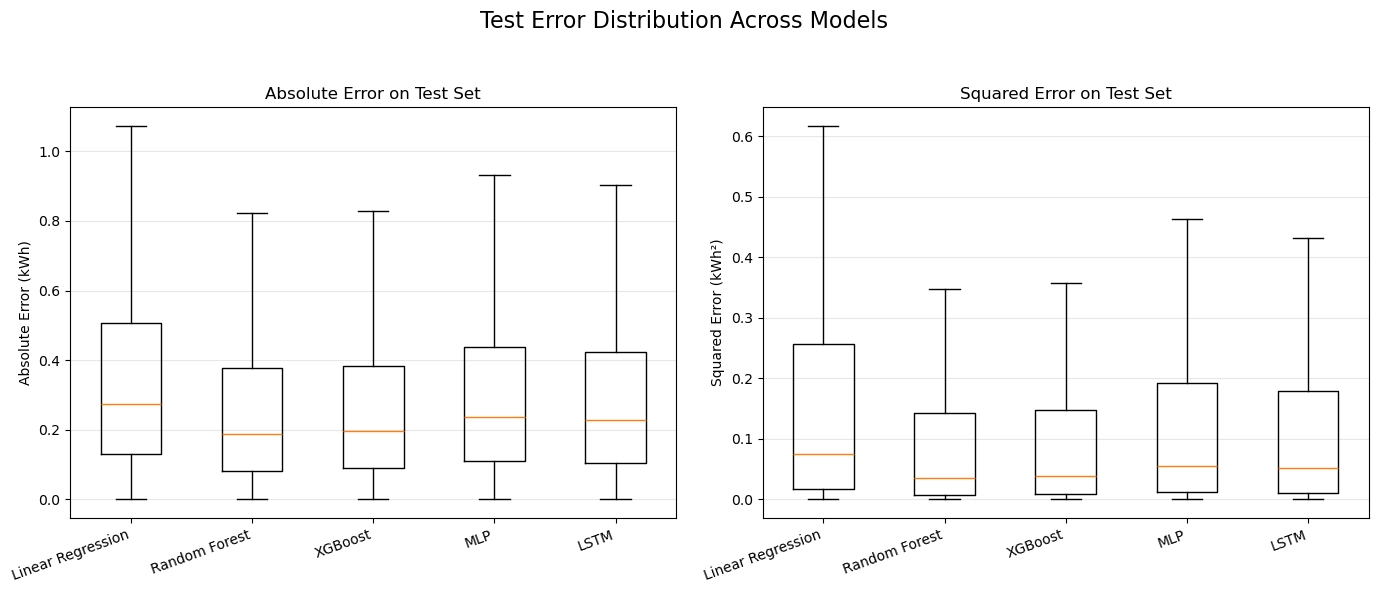

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================
# 1. Specify your error CSV files here
# =====================================
error_files = {
    "Linear Regression": "best_model_predictions_elastic.csv",
    "Random Forest": "rf_test_errors.csv",
    "XGBoost":       "xgboost_test_errors.csv",
    "MLP":           "MLP_test_errors.csv",
    "LSTM":          "LSTM_test_errors.csv",
}

# =====================================
# 2. Load all errors and build a summary
# =====================================

summary_rows = []
all_errors_list = []   # for plotting later

for model_name, path in error_files.items():
    df = pd.read_csv(path)

    # Store per-sample errors together with model name
    df["model"] = model_name
    all_errors_list.append(df[["model", "abs_error", "squared_error", "percentage_error"]])

    # Compute summary statistics for this model
    mean_abs = df["abs_error"].mean()
    median_abs = df["abs_error"].median()
    max_abs = df["abs_error"].max()

    # RMSE from squared_error
    rmse_from_err = np.sqrt(df["squared_error"].mean())

    mean_pct = df["percentage_error"].mean()
    median_pct = df["percentage_error"].median()

    summary_rows.append({
        "model": model_name,
        "mean_abs_error": mean_abs,
        "median_abs_error": median_abs,
        "max_abs_error": max_abs,
        "rmse_from_squared_error": rmse_from_err,
        "mean_percentage_error": mean_pct,
        "median_percentage_error": median_pct,
    })

# Combine into a single DataFrame
error_summary_df = pd.DataFrame(summary_rows)
print("===== Test error summary (per model) =====")
print(error_summary_df)

# Combine all per-sample errors for plotting
all_errors_df = pd.concat(all_errors_list, ignore_index=True)

# =====================================
# 3. Plot error distributions for all models
#    (absolute error + squared error)
# =====================================

models = list(error_files.keys())

# Prepare data for boxplots
abs_error_data = []
sq_error_data  = []

for model_name in models:
    sub = all_errors_df[all_errors_df["model"] == model_name]
    abs_error_data.append(sub["abs_error"].values)
    sq_error_data.append(sub["squared_error"].values)

# Create a figure with two subplots: abs_error & squared_error
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Absolute error boxplot ----
axes[0].boxplot(abs_error_data, tick_labels=models, showfliers=False)
axes[0].set_title("Absolute Error on Test Set")
axes[0].set_ylabel("Absolute Error (kWh)")
axes[0].set_xticklabels(models, rotation=20, ha="right")
axes[0].grid(axis="y", alpha=0.3)

# ---- Squared error boxplot (replaces percentage error) ----
axes[1].boxplot(sq_error_data, tick_labels=models, showfliers=False)
axes[1].set_title("Squared Error on Test Set")
axes[1].set_ylabel("Squared Error (kWh²)")
axes[1].set_xticklabels(models, rotation=20, ha="right")
axes[1].grid(axis="y", alpha=0.3)

plt.suptitle("Test Error Distribution Across Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("test_error_distribution_across_models.png", dpi=300, bbox_inches="tight")
plt.show()